<a href="https://colab.research.google.com/github/giorgospan/Malicious-Website-Detection/blob/main/Spam_Page_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Feature Selection



### Load Spam Pages features from *ISCXURL2016* dataset

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('/content/drive/MyDrive/di/ISCXURL2016.zip')
X = pd.read_csv(zf.open('FinalDataset/Spam.csv'))

In [119]:
X = X.fillna(0)

In [120]:
X.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,2,12,5.5,8,4.083334,2,15,7,0,0,0,0,0,0,0,0,0,0,80,12,61,61,2,2,2,0.762500,0.025000,0.166667,0.150000,5.083334,0.032787,0,-1,1,-1,0.750000,-1,10,0,6,2,2,-1,54,11,0,0,39,-1,48,8,8,8,-1,0,0,5,0,7,-1,0.125000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,6,1,-1,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
1,0,3,12,5.0,10,3.583333,3,12,8,2,0,2,2,0,0,0,0,0,0,78,17,54,54,40,4,2,0.692308,0.025641,0.117647,0.217949,3.176471,0.037037,0,-1,3,-1,0.647059,-1,8,0,6,2,0,-1,54,15,0,31,4,-1,40,10,8,7,-1,0,0,4,0,8,-1,0.102564,0.0,0.666667,0.044444,0.000000,-1.000000,7,2,2,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
2,2,2,11,4.0,5,4.750000,2,16,11,0,0,0,0,0,0,0,0,0,0,71,9,54,54,2,2,7,0.760563,0.098592,0.777778,0.126761,6.000000,0.129630,0,-1,1,-1,0.666667,2,0,0,0,0,0,0,57,8,19,19,6,2,22,5,7,7,2,0,1,6,0,3,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8,1,4,2,0,1,0.677701,1.000000,0.677704,0.916667,0.00000,0.898227,benign
3,0,2,7,4.5,7,5.714286,2,15,10,0,0,0,0,0,0,0,0,0,0,64,10,47,47,2,2,2,0.734375,0.031250,0.200000,0.156250,4.700000,0.042553,0,-1,1,-1,0.800000,-1,0,0,0,0,0,-1,53,9,5,5,30,-1,33,7,11,7,-1,0,0,4,0,3,-1,0.000000,0.0,0.000000,0.000000,0.000000,-1.000000,5,1,2,0,0,-1,0.696067,0.879588,0.818007,0.753585,0.00000,-1.000000,benign
4,19,2,10,6.0,9,2.250000,2,9,5,0,0,0,0,0,0,0,0,0,0,68,13,48,48,2,2,35,0.705882,0.514706,2.692308,0.191176,3.692308,0.729167,0,-1,2,-1,0.769231,13,6,0,0,0,6,6,48,12,3,3,26,12,39,9,7,7,13,0,2,3,0,4,3,0.088235,0.0,0.000000,0.139535,0.153846,0.171429,9,1,1,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign


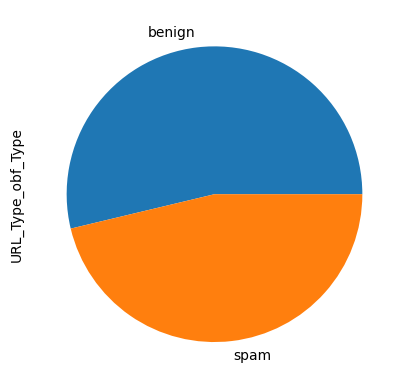

In [121]:
labels = X['URL_Type_obf_Type']

labels.value_counts().plot(kind='pie')

In [122]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(X['URL_Type_obf_Type'])

In [123]:
X = X.drop(['URL_Type_obf_Type'], axis=1)

X.shape

(14479, 79)

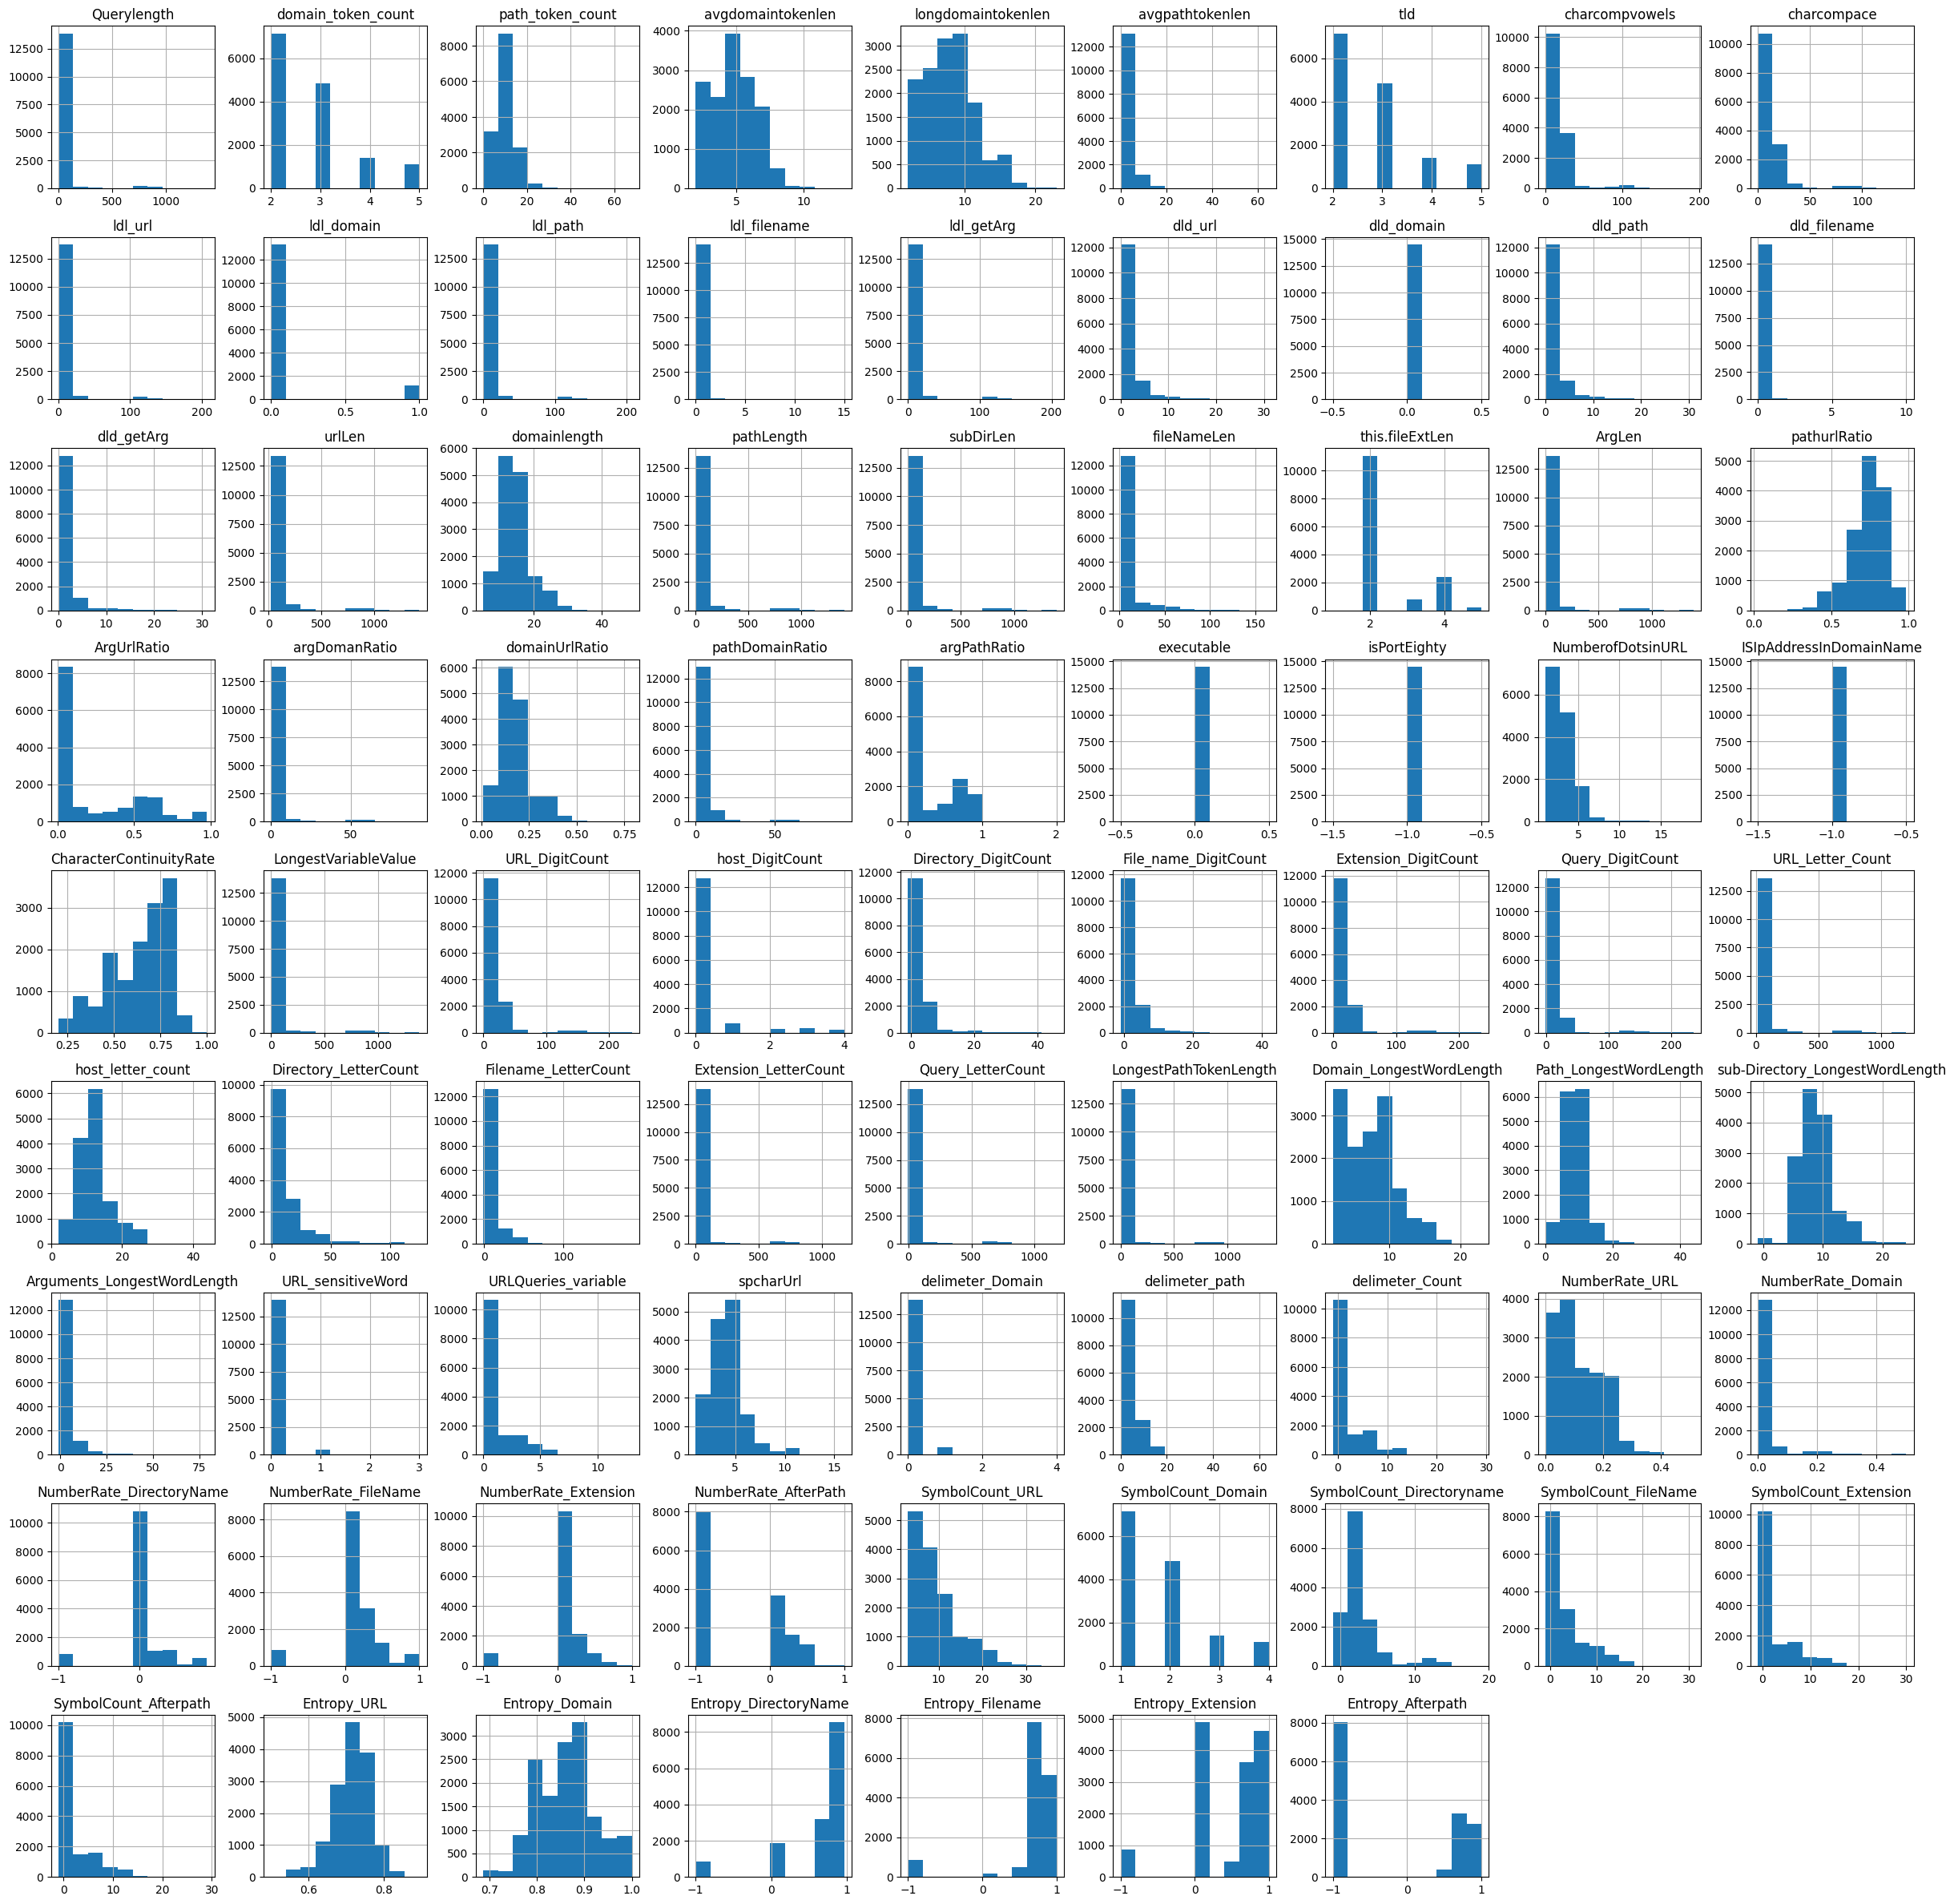

In [124]:
import matplotlib.pyplot as plt

X.hist(figsize=(30, 30))
plt.show()

### Detect highly correlated features

In [125]:
test_size = 0.3
seed = 42

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [127]:
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

In [128]:
cf = correlatedFeatures(X_train, 0.85)
cf

{'ArgLen',
 'Domain_LongestWordLength',
 'Entropy_Afterpath',
 'Extension_DigitCount',
 'Extension_LetterCount',
 'LongestPathTokenLength',
 'LongestVariableValue',
 'NumberRate_Domain',
 'Query_DigitCount',
 'Query_LetterCount',
 'SymbolCount_Afterpath',
 'SymbolCount_Domain',
 'SymbolCount_Extension',
 'URL_DigitCount',
 'URL_Letter_Count',
 'argDomanRatio',
 'argPathRatio',
 'charcompace',
 'charcompvowels',
 'delimeter_Count',
 'dld_filename',
 'dld_getArg',
 'dld_path',
 'domainUrlRatio',
 'host_letter_count',
 'ldl_getArg',
 'ldl_path',
 'ldl_url',
 'longdomaintokenlen',
 'pathDomainRatio',
 'pathLength',
 'subDirLen',
 'tld',
 'urlLen'}

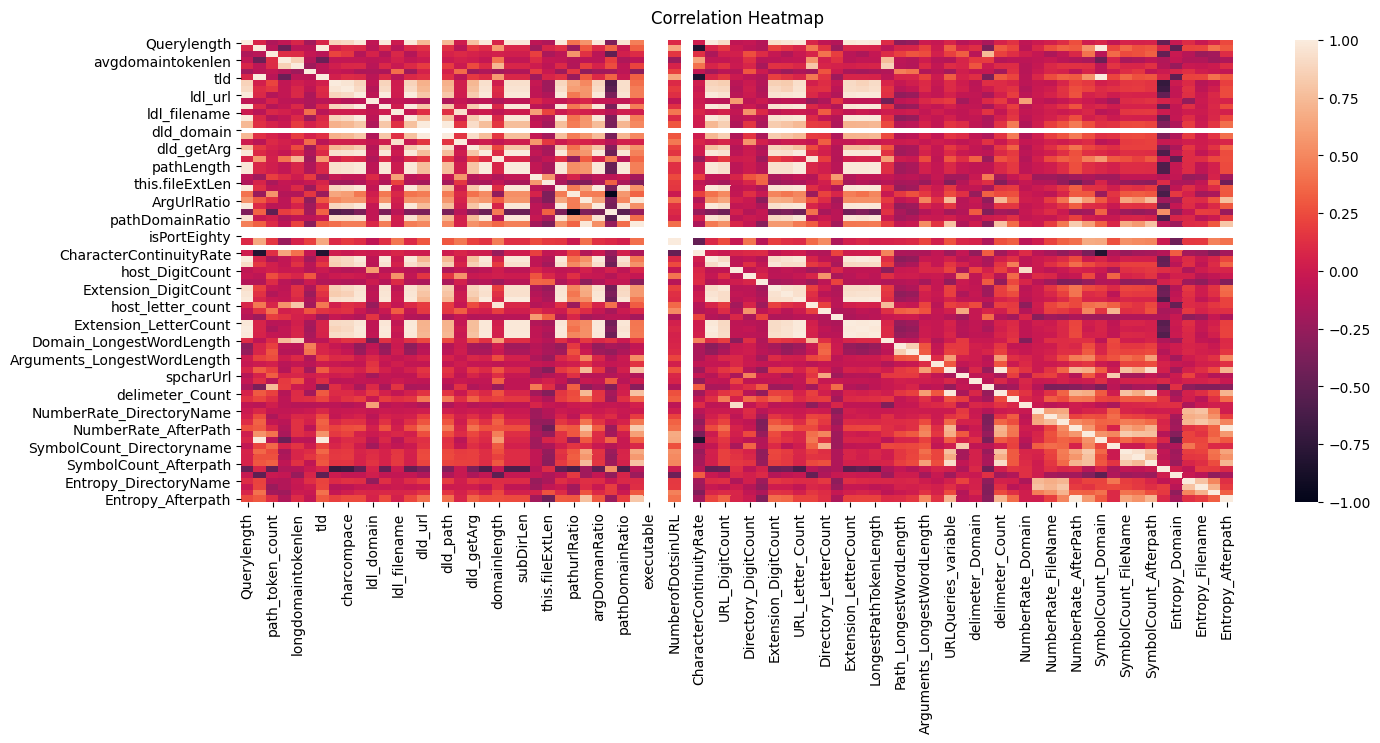

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sns.heatmap(X_train.corr());

plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Identify the K-Best features

In [130]:
K_ = 35

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [132]:
# Perform feature selection using a univariate statistical test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

kbest = SelectKBest(score_func=f_classif, k=K_)
kbest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [15 32 33 35] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=35, score_func=<function f_classif at 0x7f7b4e27c680>)

range(0, 79)


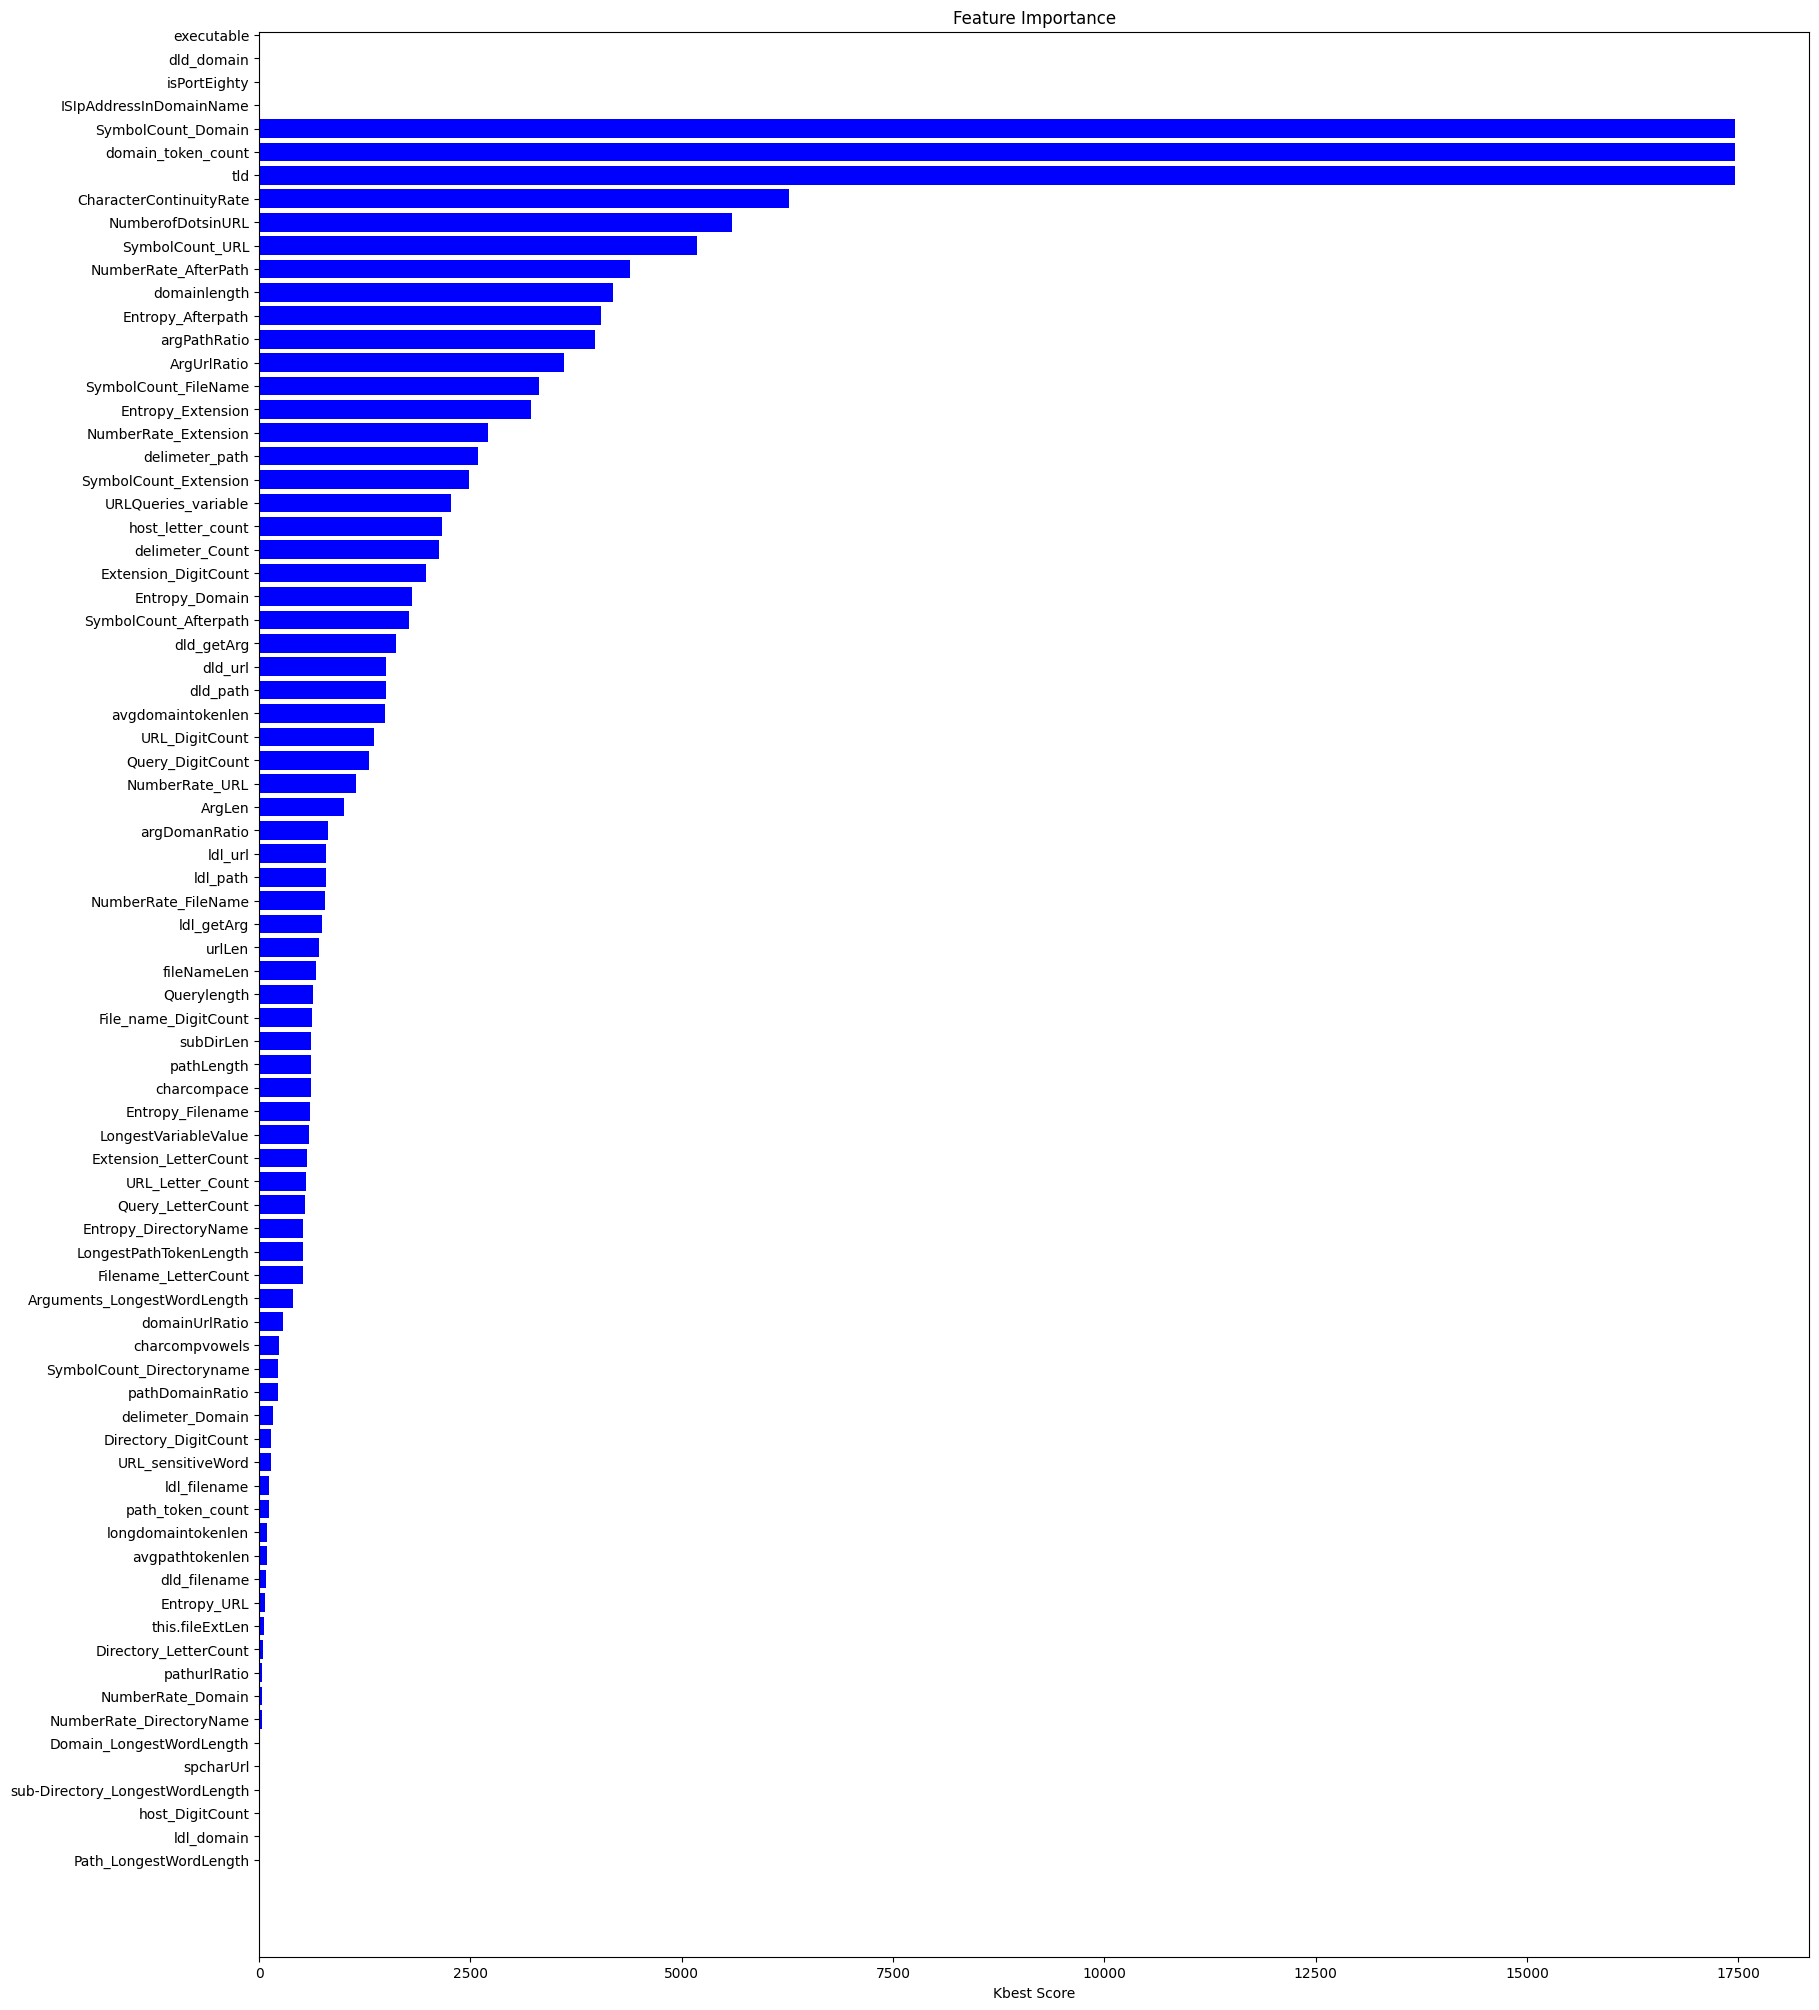

In [133]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

features = X_train.columns
vars_ = kbest.scores_
indices = np.argsort(vars_)

print(range(len(indices)))
plt.figure(figsize=(20,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), vars_[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Kbest Score')
plt.show()

In [134]:
low_score = set(X.columns[~kbest.get_support()])
print("Removed features:", low_score)

Removed features: {'Querylength', 'urlLen', 'Entropy_URL', 'spcharUrl', 'isPortEighty', 'URL_sensitiveWord', 'Directory_LetterCount', 'delimeter_Domain', 'charcompace', 'Domain_LongestWordLength', 'URL_Letter_Count', 'this.fileExtLen', 'dld_domain', 'ISIpAddressInDomainName', 'LongestPathTokenLength', 'pathLength', 'Arguments_LongestWordLength', 'pathDomainRatio', 'NumberRate_Domain', 'Entropy_Filename', 'ldl_domain', 'dld_filename', 'executable', 'pathurlRatio', 'Directory_DigitCount', 'ldl_filename', 'NumberRate_DirectoryName', 'path_token_count', 'charcompvowels', 'Extension_LetterCount', 'LongestVariableValue', 'sub-Directory_LongestWordLength', 'Query_LetterCount', 'host_DigitCount', 'SymbolCount_Directoryname', 'File_name_DigitCount', 'Filename_LetterCount', 'avgpathtokenlen', 'Entropy_DirectoryName', 'subDirLen', 'Path_LongestWordLength', 'fileNameLen', 'longdomaintokenlen', 'domainUrlRatio'}


In [135]:
to_remove = set.union(cf, low_score)

len(to_remove)

62

In [136]:
# Remove the correlated features
X_train = X_train.drop(to_remove, axis=1)
X_test = X_test.drop(to_remove, axis=1)

In [137]:
print(X_train.shape)
print(X_test.shape)

(10135, 17)
(4344, 17)


In [138]:
features = X_train.columns

features

Index(['domain_token_count', 'avgdomaintokenlen', 'dld_url', 'domainlength',
       'ArgUrlRatio', 'NumberofDotsinURL', 'CharacterContinuityRate',
       'URLQueries_variable', 'delimeter_path', 'NumberRate_URL',
       'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath',
       'SymbolCount_URL', 'SymbolCount_FileName', 'Entropy_Domain',
       'Entropy_Extension'],
      dtype='object')

# Part 2: Classifier Selection


In [139]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [140]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.998
	Precision: 0.997
	Recall: 1.000
	F1: 0.998



In [141]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [142]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.986
	Precision: 0.977
	Recall: 0.994
	F1: 0.986



In [143]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [144]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.987
	Precision: 0.979
	Recall: 0.993
	F1: 0.986



In [145]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [146]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.996
	Precision: 0.996
	Recall: 0.995
	F1: 0.996



In [147]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [148]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.941
	Precision: 0.902
	Recall: 0.979
	F1: 0.939



In [149]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [150]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.995
	Precision: 0.994
	Recall: 0.995
	F1: 0.994



In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [152]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.997
	Precision: 0.997
	Recall: 0.996
	F1: 0.996



In [153]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter = 10000)), ('rf', RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)), ('gnb', GaussianNB())], voting='hard')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [154]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.989
	Precision: 0.982
	Recall: 0.995
	F1: 0.988



#### K-Fold CV

In [155]:
def get_model(classifier):
  if classifier == 'random-forest':
    model = RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)
  elif classifier == 'svc':
    model = LinearSVC(random_state=0, tol=1e-5)
  elif classifier == 'logisticreg':
    model = LogisticRegression(max_iter = 10000)
  elif classifier == 'knn':
    model = KNeighborsClassifier(n_neighbors=2)
  elif classifier == 'naive-bayes':
    model = GaussianNB()
  elif classifier == 'decision-tree':
    model = DecisionTreeClassifier(random_state=0)
  elif classifier == 'bagging-dtree':
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0))
  elif classifier == 'voting':
    model = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter = 10000)), ('rf', RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)), ('gnb', GaussianNB())], voting='hard')
  else:
    model = None
  return model

In [191]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

classifiers = ['random-forest', 'svc', 'logisticreg', 'knn', 'naive-bayes', 'decision-tree', 'bagging-dtree', 'voting']
scoring = ['f1_macro', 'accuracy', 'precision_macro']

scores = {}
for clf in classifiers:
  model = get_model(clf)
  scores[clf] = cross_validate(model, X_train, y_train, scoring=scoring,cv=10)
  sorted(scores[clf].keys())

scores

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

{'bagging-dtree': {'fit_time': array([0.23825622, 0.22890449, 0.22308159, 0.22674179, 0.20997214,
         0.21504736, 0.23473644, 0.21773434, 0.22614384, 0.21872401]),
  'score_time': array([0.00588059, 0.00547695, 0.00559568, 0.00551414, 0.00594568,
         0.00552344, 0.00560927, 0.00562501, 0.00587606, 0.00579858]),
  'test_accuracy': array([0.99013807, 0.99901381, 0.99704142, 0.99802761, 0.99605523,
         0.99605133, 0.99901283, 0.9970385 , 0.9970385 , 0.99901283]),
  'test_f1_macro': array([0.9900763 , 0.99900778, 0.99702335, 0.99801587, 0.99603411,
         0.99602839, 0.99900695, 0.99701897, 0.99701991, 0.99900725]),
  'test_precision_macro': array([0.9902337 , 0.99908592, 0.99710118, 0.99801587, 0.99576271,
         0.99588259, 0.99893162, 0.99726776, 0.99726277, 0.9989339 ])},
 'decision-tree': {'fit_time': array([0.03228736, 0.04144454, 0.026896  , 0.03592062, 0.03424692,
         0.03463864, 0.03677225, 0.03637958, 0.03954625, 0.04240966]),
  'score_time': array([0.0039

In [192]:
from statistics import mean

f1_scores = {}
for x in classifiers:
  f1_scores[x] = (scores[x].get('test_accuracy'))

f1_scores

{'bagging-dtree': array([0.99013807, 0.99901381, 0.99704142, 0.99802761, 0.99605523,
        0.99605133, 0.99901283, 0.9970385 , 0.9970385 , 0.99901283]),
 'decision-tree': array([0.99112426, 0.99802761, 0.99506903, 0.99704142, 0.99704142,
        0.994077  , 0.9970385 , 0.99506417, 0.99605133, 0.99802567]),
 'knn': array([0.99013807, 0.99901381, 0.99309665, 0.99309665, 0.99309665,
        0.9911155 , 0.99210267, 0.99506417, 0.99506417, 0.99901283]),
 'logisticreg': array([0.98619329, 0.99013807, 0.98717949, 0.99309665, 0.98224852,
        0.9851925 , 0.9851925 , 0.98716683, 0.9851925 , 0.988154  ]),
 'naive-bayes': array([0.93786982, 0.95266272, 0.94871795, 0.94280079, 0.93392505,
        0.94076999, 0.92991115, 0.94471866, 0.92991115, 0.94965449]),
 'random-forest': array([0.99605523, 0.99901381, 1.        , 1.        , 0.99704142,
        0.99605133, 0.9970385 , 0.99901283, 0.99802567, 0.99901283]),
 'svc': array([0.98422091, 0.99112426, 0.99309665, 0.99211045, 0.98422091,
        0

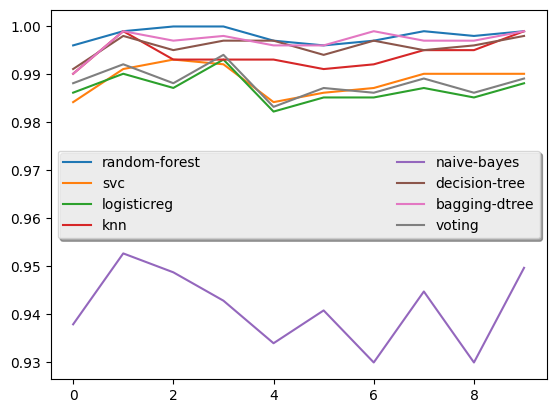

In [193]:
t1 = np.arange(1, 11, 1)
for model in f1_scores:
  plt.plot(f1_scores[model], label=model)


leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

plt.show()

# Part 3: Feature Extraction

### Load test dataset from *ISCXURL2016* dataset

In [159]:
import pandas as pd
import zipfile

cols = ['URL']

zf = zipfile.ZipFile('/content/drive/MyDrive/di/ISCXURL2016.zip')

Spam = pd.read_csv(zf.open('FinalDataset/URL/spam_dataset.csv'), header=None)
Spam.columns = cols
Spam['label'] = 'spam'

Benign = pd.read_csv(zf.open('FinalDataset/URL/Benign_list_big_final.csv'), header=None)
Benign.columns = cols
Benign['label'] = 'benign'

In [160]:
X_ = Benign.append(Spam)
X_.shape

(47378, 2)

In [161]:
X_.head()

,URL,label
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign


### Extract Features from test dataset

In [162]:
from string import punctuation

SYMBOLS = '{}()[],:;+*|<>~$@$%^`%!'
DIGITS = '1234567890'
LETTERS = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

def conseq_digits(token):
  max_occ = [0]
  curr = 0
  for ch in token:
    if ch in DIGITS:
      curr+=1
    else:
      max_occ.append(curr)
      curr = 0
  return max(max_occ)

def conseq_chars(token):
  max_occ = [0]
  curr = 0
  for ch in token:
    if ch in LETTERS:
      curr+=1
    else:
      max_occ.append(curr)
      curr = 0
  return max(max_occ)

def conseq_symbols(token):
  max_occ = [0]
  curr = 0
  for ch in token:
    if ch in SYMBOLS:
      curr+=1
    else:
      max_occ.append(curr)
      curr = 0
  return max(max_occ)

def char_continuity_rate(url, len):
  return ((conseq_digits(url) + conseq_symbols(url) + conseq_chars(url)) / len)

In [163]:
def count_symbols(token):
  if len(token) == 0:
    return -1

  s = 0
  for ch in token:
    if ch in SYMBOLS:
      s+=1
  return s

def count_digits(token):
  s = 0
  for ch in token:
    if ch in DIGITS:
      s+=1
  return s

In [164]:
def dld(token):
  n = len(token)
  c = 0
  for i in range(0,n):
    if i+1 >= n-1:
      break
    if token[i] in DIGITS and token[i+2] in DIGITS and token[i+1] in LETTERS:
      c += 3
  return c

In [165]:
# from urllib.parse import urlparse

def get_params_len(query):
  len_ = 0
  # query_string = urlparse.urlparse(url) 
  for param in query:  
    len_ += len(param)
  return len_

def get_ext(url):
    """Return the filename extension from url, or ''."""
    parsed = urlparse(url)
    root, ext = splitext(parsed.path)
    return ext  # or ext[1:] if you don't want the leading '.'

In [166]:
import math
from __future__ import division
from collections import Counter
import math

# entropy calculation of a string
def shannon(string):
  "Calculates the Shannon entropy of a string"
  if len(string) == 0:
    return -1
  # get probability of chars in string
  prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list(string)) ]

  # calculate the entropy
  entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob ])

  return entropy

In [167]:
from urllib.parse import urlparse, urlsplit, unquote
from urllib import parse
import os
import re
from os.path import splitext

X_['domain'] = [urlparse(x).netloc for x in X_['URL']]
X_['path'] = [urlparse(x).path for x in X_['URL']]
X_['params'] = [urlparse(x).params for x in X_['URL']]
X_['query'] = [urlparse(x).query for x in X_['URL']]
X_['fragment'] = [urlparse(x).fragment for x in X_['URL']]
X_['filename'] = [os.path.splitext(path)[0] for path in X_['path']]
X_['extension'] = [os.path.splitext(path)[1] for path in X_['path']]

X_['domainlength'] = [len(domain) for domain in X_['domain']]
X_['domain_tokens'] = [re.split('\W+',domain) for domain in X_['domain']]
X_['domain_token_count'] = [len(tok) for tok in X_['domain_tokens']]
X_['avgdomaintokenlen'] = [-1 if y == 0 else len(''.join(x)) / y for x, y in zip(X_['domain_tokens'], X_['domain_token_count'])]
X_['NumberofDotsinURL'] = X_['URL'].str.count('\.')
X_['Entropy_Domain'] = [shannon(domain) for domain in X_['domain']]
X_['URLQueries_variable'] = [len(query) for query in X_['query']]
X_['ArgUrlRatio'] = [-1 if len(url) == 0 else len(args)/len(url) for url, args in zip(X_['URL'], X_['query'])]
X_['CharacterContinuityRate'] = [-1 if len == 0 else char_continuity_rate(url,len) for url, len in zip(X_['domain'], X_['domainlength'])] #maybe this
X_['delimeter_path'] = [path.count('-') + path.count('.') + path.count('_') + path.count('/') for path in X_['path']] #not sure
X_['SymbolCount_URL'] = [count_symbols(url) for url in X_['URL']] #maybe this
X_['SymbolCount_FileName'] = [count_symbols(filename) for filename in X_['filename']] #maybe this
X_['NumberRate_Extension'] = [-1 if len(ext) == 0 else conseq_digits(ext)/len(url) for ext, url in zip(X_['extension'], X_['URL'])]

X_['Entropy_Extension'] = [shannon(ext) for ext in X_['extension']]
X_['NumberRate_AfterPath'] = [-1 if len(ext) == 0 else conseq_digits(ext)/len(url) for ext, url in zip(X_['query'], X_['URL'])]

X_['NumberRate_URL'] = [-1 if len(url) == 0 else conseq_digits(url)/len(url) for url in X_['URL']]
X_['NumberRate_FileName'] = [-1 if len(filename) == 0 else conseq_digits(filename)/len(url) for filename, url in zip(X_['filename'], X_['URL'])]
X_['dld_url'] = [dld(url) for url in X_['URL']]

X_.head(10)

,URL,label,domain,path,params,query,fragment,filename,extension,domainlength,domain_tokens,domain_token_count,avgdomaintokenlen,NumberofDotsinURL,Entropy_Domain,URLQueries_variable,ArgUrlRatio,CharacterContinuityRate,delimeter_path,SymbolCount_URL,SymbolCount_FileName,NumberRate_Extension,Entropy_Extension,NumberRate_AfterPath,NumberRate_URL,NumberRate_FileName,dld_url
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,1337x.to,/torrent/1048648/American-Sniper-2014-MD-iTALi...,,,,/torrent/1048648/American-Sniper-2014-MD-iTALi...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.625000,12,1,0,-1.0,-1.000000,-1.0,0.084337,0.084337,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,1337x.to,/torrent/1110018/Blackhat-2015-RUSSIAN-720p-WE...,,,,/torrent/1110018/Blackhat-2015-RUSSIAN-720p-WE...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.625000,13,1,0,-1.0,-1.000000,-1.0,0.084337,0.084337,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,1337x.to,/torrent/1122940/Blackhat-2015-x264-1080p-WEB-...,,,,/torrent/1122940/Blackhat-2015-x264-1080p-WEB-...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.625000,13,1,0,-1.0,-1.000000,-1.0,0.084337,0.084337,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,1337x.to,/torrent/1124395/Fast-and-Furious-7-2015-HD-TS...,,,,/torrent/1124395/Fast-and-Furious-7-2015-HD-TS...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.625000,15,1,0,-1.0,-1.000000,-1.0,0.084337,0.084337,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,1337x.to,/torrent/1145504/Avengers-Age-of-Ultron-2015-C...,,,,/torrent/1145504/Avengers-Age-of-Ultron-2015-C...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.625000,13,1,0,-1.0,-1.000000,-1.0,0.084337,0.084337,0
5,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,1337x.to,/torrent/1160078/Avengers-age-of-Ultron-2015-H...,,,,/torrent/1160078/Avengers-age-of-Ultron-2015-H...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.625000,13,1,0,-1.0,-1.000000,-1.0,0.084337,0.084337,0
6,http://1337x.to/torrent/294349/American-Idol-S...,benign,1337x.to,/torrent/294349/American-Idol-S11E04-Auditions...,,,,/torrent/294349/American-Idol-S11E04-Auditions...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.625000,12,1,0,-1.0,-1.000000,-1.0,0.072289,0.072289,3
7,http://189.cn/dqmh/userCenter/myOrderInfoList....,benign,189.cn,/dqmh/userCenter/myOrderInfoList.do,,method=listMyOrderInfo_new&isVs=no,,/dqmh/userCenter/myOrderInfoList,.do,6,"[189, cn]",2,2.500000,2,2.584963,34,0.409639,0.500000,4,1,0,0.0,1.584963,0.0,0.036145,0.000000,0
8,http://2gis.ru/moscow/search/%D0%9F%D0%BE%D0%B...,benign,2gis.ru,/moscow/search/%D0%9F%D0%BE%D0%B5%D1%81%D1%82%...,,,,/moscow/search/%D0%9F%D0%BE%D0%B5%D1%81%D1%82%...,,7,"[2gis, ru]",2,3.000000,1,2.807355,0,0.000000,0.571429,7,13,12,-1.0,-1.000000,-1.0,0.024096,0.024096,0
9,http://abc.go.com/shows/general-hospital/episo...,benign,abc.go.com,/shows/general-hospital/episode-guide/2015-05/...,,,,/shows/general-hospital/episode-guide/2015-05/...,,10,"[abc, go, com]",3,2.666667,2,2.721928,0,0.000000,0.300000,12,1,0,-1.0,-1.000000,-1.0,0.048193,0.048193,0


In [168]:
from sklearn.preprocessing import LabelEncoder

# Remove extra features
y_ = LabelEncoder().fit_transform(X_['label'])
X_ = X_[['domainlength', 'domain_token_count', 'avgdomaintokenlen', 'Entropy_Domain', 'NumberofDotsinURL', 'URLQueries_variable', 'ArgUrlRatio', 'delimeter_path', 'SymbolCount_URL', 'SymbolCount_FileName', 'CharacterContinuityRate', 'NumberRate_Extension', 'Entropy_Extension', 'NumberRate_AfterPath', 'NumberRate_URL', 'NumberRate_FileName']]

X_.head(10)

(47378, 16)

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)

X = X[['domainlength', 'domain_token_count', 'avgdomaintokenlen', 'Entropy_Domain', 'NumberofDotsinURL', 'URLQueries_variable', 'ArgUrlRatio', 'delimeter_path', 'SymbolCount_URL', 'SymbolCount_FileName', 'CharacterContinuityRate', 'NumberRate_Extension', 'Entropy_Extension', 'NumberRate_AfterPath', 'NumberRate_URL', 'NumberRate_FileName']]

X_.head(10)

(14479, 16)

In [172]:
model = RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=-1,
                       oob_score=False, random_state=62, verbose=0,
                       warm_start=False)

In [183]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

classifiers = ['random-forest', 'svc', 'logisticreg', 'knn', 'naive-bayes', 'decision-tree', 'bagging-dtree', 'voting']
scoring = ['f1_macro', 'accuracy', 'precision_macro']

scores = {}
for clf in classifiers:
  model = get_model(clf)
  scores[clf] = cross_validate(model, X_, y_, scoring=scoring,cv=10)
  sorted(scores[clf].keys())

scores

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

{'bagging-dtree': {'fit_time': array([0.45287657, 0.46820021, 0.46144629, 0.47511625, 0.46638417,
         0.45837235, 0.45079374, 0.43585896, 0.45377612, 0.45093226]),
  'score_time': array([0.01116562, 0.01113009, 0.01113653, 0.01145244, 0.01099253,
         0.01103711, 0.01093292, 0.01110649, 0.01076174, 0.01093793]),
  'test_accuracy': array([0.99767835, 0.9989447 , 0.99915576, 0.99978894, 0.99978894,
         0.99957788, 0.9989447 , 0.99915576, 0.99957779, 0.99873338]),
  'test_f1_macro': array([0.99693527, 0.99860387, 0.99888464, 0.99972108, 0.99972093,
         0.99944201, 0.99860464, 0.99888402, 0.99944166, 0.99832683]),
  'test_precision_macro': array([0.99625593, 0.99901748, 0.99861068, 0.99958368, 0.99985872,
         0.99944201, 0.99874212, 0.99888402, 0.99971743, 0.99805322])},
 'decision-tree': {'fit_time': array([0.06197739, 0.0635016 , 0.06569242, 0.06301594, 0.06223559,
         0.06547713, 0.06299996, 0.06794453, 0.06983924, 0.05721974]),
  'score_time': array([0.0048

In [187]:
from statistics import mean

f1_scores = {}
for x in classifiers:
  f1_scores[x] = (scores[x].get('test_accuracy'))

f1_scores

{'bagging-dtree': array([0.99767835, 0.9989447 , 0.99915576, 0.99978894, 0.99978894,
        0.99957788, 0.9989447 , 0.99915576, 0.99957779, 0.99873338]),
 'decision-tree': array([0.9978894 , 0.99936682, 0.99852258, 0.99957788, 0.99957788,
        0.99936682, 0.99957788, 0.99936682, 0.99915558, 0.99873338]),
 'knn': array([0.99556775, 0.99620093, 0.99366821, 0.99746729, 0.99535669,
        0.99683411, 0.99662305, 0.95588856, 0.90859194, 0.7046654 ]),
 'logisticreg': array([0.9900802 , 0.9911355 , 0.98522583, 0.98881385, 0.98796961,
        0.98796961, 0.98353736, 0.95736598, 0.96812328, 0.94743509]),
 'naive-bayes': array([0.94069228, 0.96200929, 0.946813  , 0.94660194, 0.97214014,
        0.92971718, 0.85795694, 0.91599831, 0.79142917, 0.88980367]),
 'random-forest': array([0.99810046, 0.99957788, 0.99978894, 1.        , 1.        ,
        0.99978894, 0.99978894, 0.99978894, 0.99957779, 0.99894448]),
 'svc': array([0.96918531, 0.92992824, 0.93098354, 0.98839173, 0.98522583,
        0

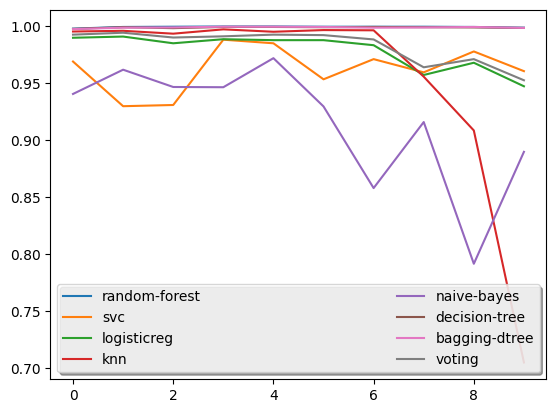

In [188]:
t1 = np.arange(1, 11, 1)
for model in f1_scores:
  plt.plot(f1_scores[model], label=model)


leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

plt.show()